# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('/content/Class A.csv')
print(df.head())

   NO NAMA  UTS  UAS  Pre-Test  Extraversion  Agreeableness  \
0   1   AR   20   81      95.0          28.0           27.0   
1   2   AM   92   87     100.0          27.0           29.0   
2   3   AQ   95   85      90.0          34.0           26.0   
3   4  BAW   20   84      85.0          24.0           27.0   
4   5   CK   85   81      95.0          25.0           33.0   

   Conscientiousness  Neuroticism  Opennsess    BFI   GSE  Self-Efficacy  \
0               31.0         22.0       32.0  140.0  30.0           45.0   
1               26.0         27.0       39.0  148.0  42.0           41.0   
2               26.0         26.0       38.0  150.0  40.0           36.0   
3               27.0         22.0       30.0  130.0  29.0           38.0   
4               25.0         23.0       29.0  135.0  28.0           33.0   

   Intrinsic Value  Test Anxiety  Cognitive Strategy  Self-Regulation   MSLQ  
0             41.0          17.0                57.0             34.0  194.0  
1     

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NO                  36 non-null     int64  
 1   NAMA                36 non-null     object 
 2   UTS                 36 non-null     int64  
 3   UAS                 36 non-null     int64  
 4   Pre-Test            29 non-null     float64
 5   Extraversion        29 non-null     float64
 6   Agreeableness       29 non-null     float64
 7   Conscientiousness   29 non-null     float64
 8   Neuroticism         29 non-null     float64
 9   Opennsess           29 non-null     float64
 10  BFI                 29 non-null     float64
 11  GSE                 29 non-null     float64
 12  Self-Efficacy       29 non-null     float64
 13  Intrinsic Value     29 non-null     float64
 14  Test Anxiety        29 non-null     float64
 15  Cognitive Strategy  29 non-null     float64
 16  Self-Regul

In [4]:
df.head()

,NO,NAMA,UTS,UAS,Pre-Test,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Opennsess,BFI,GSE,Self-Efficacy,Intrinsic Value,Test Anxiety,Cognitive Strategy,Self-Regulation,MSLQ
0,1,AR,20,81,95.0,28.0,27.0,31.0,22.0,32.0,140.0,30.0,45.0,41.0,17.0,57.0,34.0,194.0
1,2,AM,92,87,100.0,27.0,29.0,26.0,27.0,39.0,148.0,42.0,41.0,40.0,22.0,44.0,31.0,178.0
2,3,AQ,95,85,90.0,34.0,26.0,26.0,26.0,38.0,150.0,40.0,36.0,36.0,16.0,44.0,33.0,165.0
3,4,BAW,20,84,85.0,24.0,27.0,27.0,22.0,30.0,130.0,29.0,38.0,37.0,16.0,52.0,36.0,179.0
4,5,CK,85,81,95.0,25.0,33.0,25.0,23.0,29.0,135.0,28.0,33.0,42.0,12.0,55.0,39.0,181.0


# 2. Check Missing Value

In [5]:
df.isnull().sum()

,0
NO,0
NAMA,0
UTS,0
UAS,0
Pre-Test,7
Extraversion,7
Agreeableness,7
Conscientiousness,7
Neuroticism,7
Opennsess,7


## 2.1 Fill Missing Value

In [6]:
df['Pre-Test'].fillna(df['Pre-Test'].mean(), inplace=True)
df['UTS'].fillna(df['UTS'].mean(), inplace=True)
df['Extraversion'].fillna(df['Extraversion'].mean(), inplace=True)
df['Agreeableness'].fillna(df['Agreeableness'].mean(), inplace=True)
df['Conscientiousness'].fillna(df['Conscientiousness'].mean(), inplace=True)
df['Neuroticism'].fillna(df['Neuroticism'].mean(), inplace=True)
df['Opennsess'].fillna(df['Opennsess'].mean(), inplace=True)
df['GSE'].fillna(df['GSE'].mean(), inplace=True)
df['Self-Efficacy'].fillna(df['Self-Efficacy'].mean(), inplace=True)
df['Intrinsic Value'].fillna(df['Intrinsic Value'].mean(), inplace=True)
df['Test Anxiety'].fillna(df['Test Anxiety'].mean(), inplace=True)
df['Cognitive Strategy'].fillna(df['Cognitive Strategy'].mean(), inplace=True)
df['Self-Regulation'].fillna(df['Self-Regulation'].mean(), inplace=True)

df.isnull().sum()
df.head()

/tmp/ipython-input-2650829358.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Pre-Test'].fillna(df['Pre-Test'].mean(), inplace=True)
/tmp/ipython-input-2650829358.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

,NO,NAMA,UTS,UAS,Pre-Test,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Opennsess,BFI,GSE,Self-Efficacy,Intrinsic Value,Test Anxiety,Cognitive Strategy,Self-Regulation,MSLQ
0,1,AR,20,81,95.0,28.0,27.0,31.0,22.0,32.0,140.0,30.0,45.0,41.0,17.0,57.0,34.0,194.0
1,2,AM,92,87,100.0,27.0,29.0,26.0,27.0,39.0,148.0,42.0,41.0,40.0,22.0,44.0,31.0,178.0
2,3,AQ,95,85,90.0,34.0,26.0,26.0,26.0,38.0,150.0,40.0,36.0,36.0,16.0,44.0,33.0,165.0
3,4,BAW,20,84,85.0,24.0,27.0,27.0,22.0,30.0,130.0,29.0,38.0,37.0,16.0,52.0,36.0,179.0
4,5,CK,85,81,95.0,25.0,33.0,25.0,23.0,29.0,135.0,28.0,33.0,42.0,12.0,55.0,39.0,181.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NO                  36 non-null     int64  
 1   NAMA                36 non-null     object 
 2   UTS                 36 non-null     int64  
 3   UAS                 36 non-null     int64  
 4   Pre-Test            36 non-null     float64
 5   Extraversion        36 non-null     float64
 6   Agreeableness       36 non-null     float64
 7   Conscientiousness   36 non-null     float64
 8   Neuroticism         36 non-null     float64
 9   Opennsess           36 non-null     float64
 10  BFI                 29 non-null     float64
 11  GSE                 36 non-null     float64
 12  Self-Efficacy       36 non-null     float64
 13  Intrinsic Value     36 non-null     float64
 14  Test Anxiety        36 non-null     float64
 15  Cognitive Strategy  36 non-null     float64
 16  Self-Regul

In [8]:
df.isnull().sum()

,0
NO,0
NAMA,0
UTS,0
UAS,0
Pre-Test,0
Extraversion,0
Agreeableness,0
Conscientiousness,0
Neuroticism,0
Opennsess,0


## 2.2 Normilize Data with Min-Max Scaler

In [9]:
cols_to_normalize = ['UTS', 'UAS', 'Pre-Test','Extraversion','Agreeableness','Conscientiousness','Neuroticism','Opennsess','GSE','Self-Efficacy','Intrinsic Value','Test Anxiety','Cognitive Strategy','Self-Regulation']

scaler = MinMaxScaler()
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])
df

,NO,NAMA,UTS,UAS,Pre-Test,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Opennsess,BFI,GSE,Self-Efficacy,Intrinsic Value,Test Anxiety,Cognitive Strategy,Self-Regulation,MSLQ
0,1,AR,0.000000,0.65,0.900000,0.727273,0.200000,0.588235,0.312500,0.470588,140.0,0.294118,0.464286,0.424242,0.571429,0.419355,0.125000,194.0
1,2,AM,0.960000,0.95,1.000000,0.681818,0.333333,0.294118,0.625000,0.882353,148.0,1.000000,0.321429,0.393939,0.809524,0.000000,0.000000,178.0
2,3,AQ,1.000000,0.85,0.800000,1.000000,0.133333,0.294118,0.562500,0.823529,150.0,0.882353,0.142857,0.272727,0.523810,0.000000,0.083333,165.0
3,4,BAW,0.000000,0.80,0.700000,0.545455,0.200000,0.352941,0.312500,0.352941,130.0,0.235294,0.214286,0.303030,0.523810,0.258065,0.208333,179.0
4,5,CK,0.866667,0.65,0.900000,0.590909,0.600000,0.235294,0.375000,0.294118,135.0,0.176471,0.035714,0.454545,0.333333,0.354839,0.333333,181.0
5,6,DDL,1.000000,0.90,0.900000,0.590909,0.200000,0.588235,0.000000,0.647059,135.0,0.411765,0.535714,0.757576,0.619048,0.225806,0.333333,207.0
6,7,DAPY,1.000000,0.95,1.000000,0.545455,1.000000,0.470588,0.250000,0.529412,146.0,0.176471,0.428571,0.636364,0.476190,0.419355,0.291667,202.0
7,8,EYRP,1.000000,0.85,0.500000,0.500000,0.466667,0.235294,0.250000,0.352941,130.0,0.176471,0.285714,0.424242,0.619048,0.354839,0.208333,190.0
8,9,FR,0.666667,0.95,1.000000,0.545455,0.400000,0.352941,0.437500,0.529412,138.0,0.352941,0.250000,0.454545,0.666667,0.322581,0.333333,193.0
9,10,FMK,1.000000,0.95,0.700000,0.545455,0.266667,0.294118,0.375000,0.411765,132.0,0.294118,0.142857,0.272727,0.523810,0.354839,0.208333,179.0


# 3. Features Selection

In [10]:
features = df[['UTS', 'UAS', 'Pre-Test','Extraversion','Agreeableness','Conscientiousness','Neuroticism','Opennsess','GSE','Self-Efficacy','Intrinsic Value','Test Anxiety','Cognitive Strategy','Self-Regulation']]

## 3.1 Elbow Method

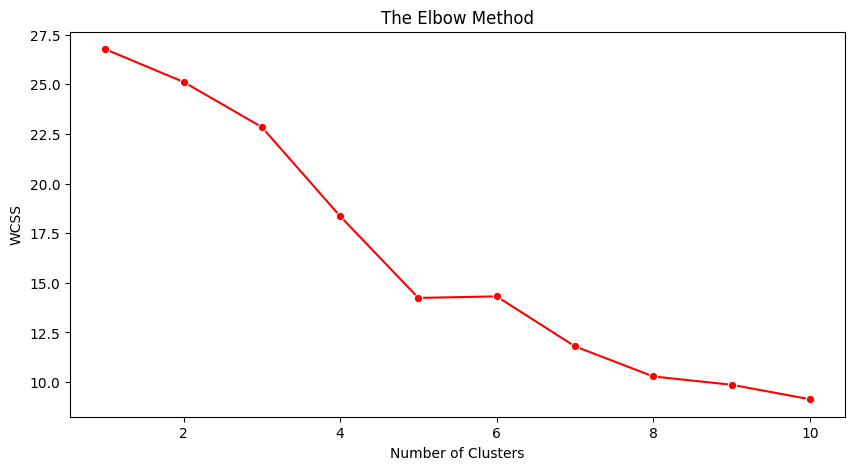

Cluster 1: WCSS = 26.76208886715516
Cluster 2: WCSS = 25.115002419028052
Cluster 3: WCSS = 22.84255697890219
Cluster 4: WCSS = 18.35644827546561
Cluster 5: WCSS = 14.238789672631452
Cluster 6: WCSS = 14.316061442510726
Cluster 7: WCSS = 11.800260633511359
Cluster 8: WCSS = 10.28518329184142
Cluster 9: WCSS = 9.866077412485351
Cluster 10: WCSS = 9.13752101198407


In [11]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, max_iter=300)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
for i, val in enumerate(wcss, start=1):
    print(f"Cluster {i}: WCSS = {val}")

# 4. K-Means Clustering

In [12]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(features)
df['Cluster'] = cluster_labels

df.head()

,NO,NAMA,UTS,UAS,Pre-Test,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Opennsess,BFI,GSE,Self-Efficacy,Intrinsic Value,Test Anxiety,Cognitive Strategy,Self-Regulation,MSLQ,Cluster
0,1,AR,0.000000,0.65,0.9,0.727273,0.200000,0.588235,0.3125,0.470588,140.0,0.294118,0.464286,0.424242,0.571429,0.419355,0.125000,194.0,1
1,2,AM,0.960000,0.95,1.0,0.681818,0.333333,0.294118,0.6250,0.882353,148.0,1.000000,0.321429,0.393939,0.809524,0.000000,0.000000,178.0,2
2,3,AQ,1.000000,0.85,0.8,1.000000,0.133333,0.294118,0.5625,0.823529,150.0,0.882353,0.142857,0.272727,0.523810,0.000000,0.083333,165.0,2
3,4,BAW,0.000000,0.80,0.7,0.545455,0.200000,0.352941,0.3125,0.352941,130.0,0.235294,0.214286,0.303030,0.523810,0.258065,0.208333,179.0,1
4,5,CK,0.866667,0.65,0.9,0.590909,0.600000,0.235294,0.3750,0.294118,135.0,0.176471,0.035714,0.454545,0.333333,0.354839,0.333333,181.0,4


In [13]:
df['Cluster'].value_counts()

,count
Cluster,
4,17
1,11
3,5
2,2
0,1


## 4.1 Cluster Visualization

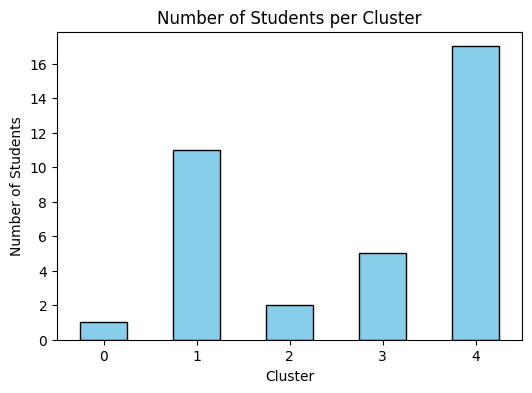

In [14]:
cluster_counts = df['Cluster'].value_counts().sort_index()

plt.figure(figsize=(6,4))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Students per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.show()

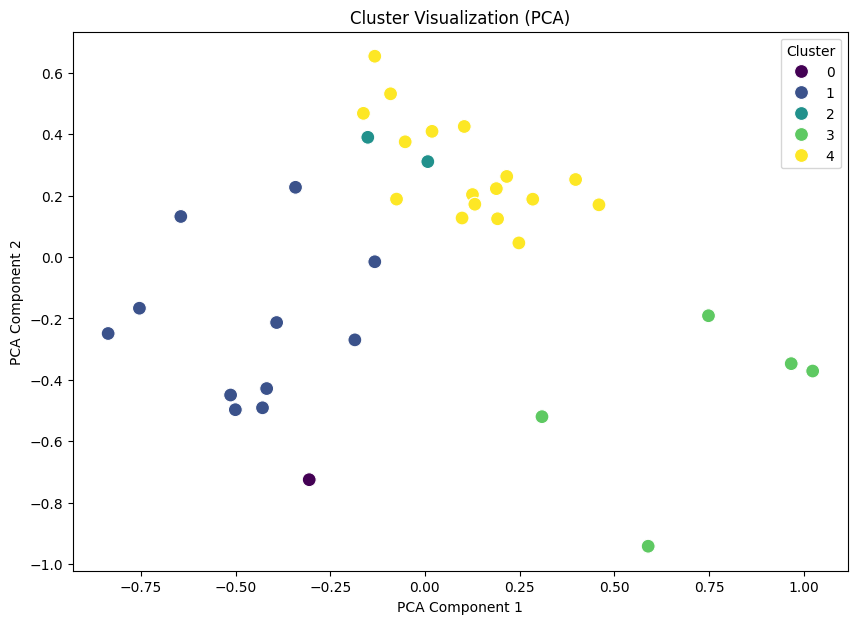

In [15]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(features)

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=data_2d[:, 0], y=data_2d[:, 1],
    hue=df['Cluster'], palette='viridis', s=100
)
plt.title('Cluster Visualization (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

## 4.2 Features Importance

In [16]:
from scipy.stats import f_oneway

for col in features:
    grouped_data = [df[df['Cluster'] == k][col] for k in df['Cluster'].unique()]
    f_val, p_val = f_oneway(*grouped_data)
    print(f"Fitur: {col} | F-Value: {f_val:.2f} | P-Value: {p_val:.4f}")

Fitur: UTS | F-Value: 30.03 | P-Value: 0.0000
Fitur: UAS | F-Value: 1.22 | P-Value: 0.3244
Fitur: Pre-Test | F-Value: 1.82 | P-Value: 0.1501
Fitur: Extraversion | F-Value: 4.67 | P-Value: 0.0046
Fitur: Agreeableness | F-Value: 3.66 | P-Value: 0.0149
Fitur: Conscientiousness | F-Value: 5.62 | P-Value: 0.0016
Fitur: Neuroticism | F-Value: 0.94 | P-Value: 0.4562
Fitur: Opennsess | F-Value: 6.17 | P-Value: 0.0009
Fitur: GSE | F-Value: 12.41 | P-Value: 0.0000
Fitur: Self-Efficacy | F-Value: 11.65 | P-Value: 0.0000
Fitur: Intrinsic Value | F-Value: 12.64 | P-Value: 0.0000
Fitur: Test Anxiety | F-Value: 0.79 | P-Value: 0.5403
Fitur: Cognitive Strategy | F-Value: 13.84 | P-Value: 0.0000
Fitur: Self-Regulation | F-Value: 6.12 | P-Value: 0.0010


# 5. Silhouette Evaluation

In [17]:
silhouette_scores = []
number_of_cluster = range(2,21)

for i in number_of_cluster:
  kmeans = KMeans(n_clusters = i, init='k-means++', random_state=42)
  kmeans.fit(features)

  labels = kmeans.labels_
  silhouette_scores.append(silhouette_score(features, labels, metric = 'euclidean'))

Text(0, 0.5, 'Silhoutte Score')

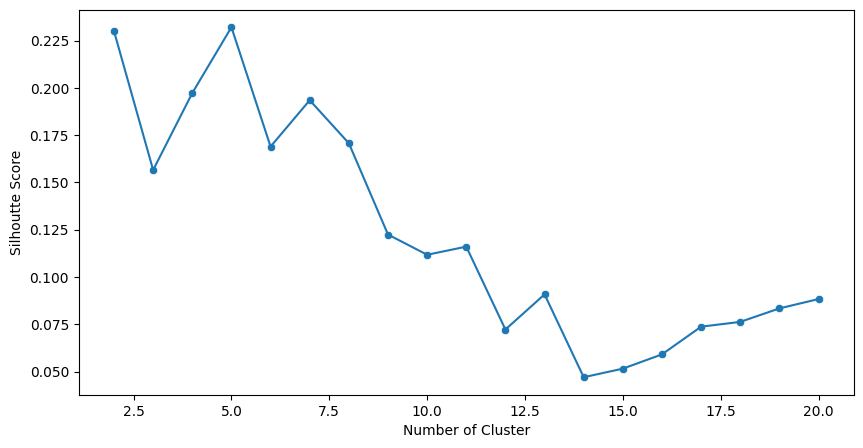

In [18]:
plt.figure(figsize=(10,5))
sns.lineplot(
    x = range(2,21),
    y = silhouette_scores
)
sns.scatterplot(
    x=range(2,21),
    y=silhouette_scores
)
plt.xticks = range(2,21)
plt.xlabel('Number of Cluster')
plt.ylabel('Silhoutte Score')

# 5. Students Grouping

In [19]:
student_id = df["NAMA"]
clusters = df["Cluster"]

In [20]:
from collections import defaultdict

groups = []
current_group = []

all_students = list(df["NAMA"].values)

for student in all_students:
    current_group.append(student)
    if len(current_group) == 5:
        groups.append(current_group)
        current_group = []

if 0 < len(current_group) < 3:
    for i, s in enumerate(current_group):
        groups[i % len(groups)].append(s)
else:
    if current_group:
        groups.append(current_group)

for i, g in enumerate(groups, 1):
    print(f"Kelompok {i}: {g}")

Kelompok 1: ['AR', 'AM', 'AQ', 'BAW', 'CK', 'RES']
Kelompok 2: ['DDL', 'DAPY', 'EYRP', 'FR', 'FMK']
Kelompok 3: ['HRA', 'HAVP', 'HFR', 'IAMP', 'IMN']
Kelompok 4: ['KNH', 'LDKP', 'MHW', 'MM', 'MSNM']
Kelompok 5: ['RDP', 'RDAP', 'SCE', 'SAR', 'SKAZ']
Kelompok 6: ['SDW', 'WKW', 'YNY', 'ZZB', 'AFAA']
Kelompok 7: ['ADR', 'FAR', 'GA', 'MGPR', 'NFP']


In [21]:
df.to_csv('clustered_student_class A.csv', index=False)